In [43]:
%reload_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,pandas,matplotlib,scikit-learn,seaborn

Sebastian Raschka 
last updated: 2016-08-03 

CPython 3.5.1
IPython 4.1.2

numpy 1.10.4
pandas 0.18.0
matplotlib 1.5.1
scikit-learn 0.17.1
seaborn 0.7.1


In [44]:
from IPython.display import Image
%matplotlib inline

In [45]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


データはこちら。
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

3. INDUS     非小売業の土地面積の割合
5. NOX       NOXの濃度
6. RM        平均部屋数
13. LSTAT    低所得者層の割合
14. MEDV     住宅の平均価格

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

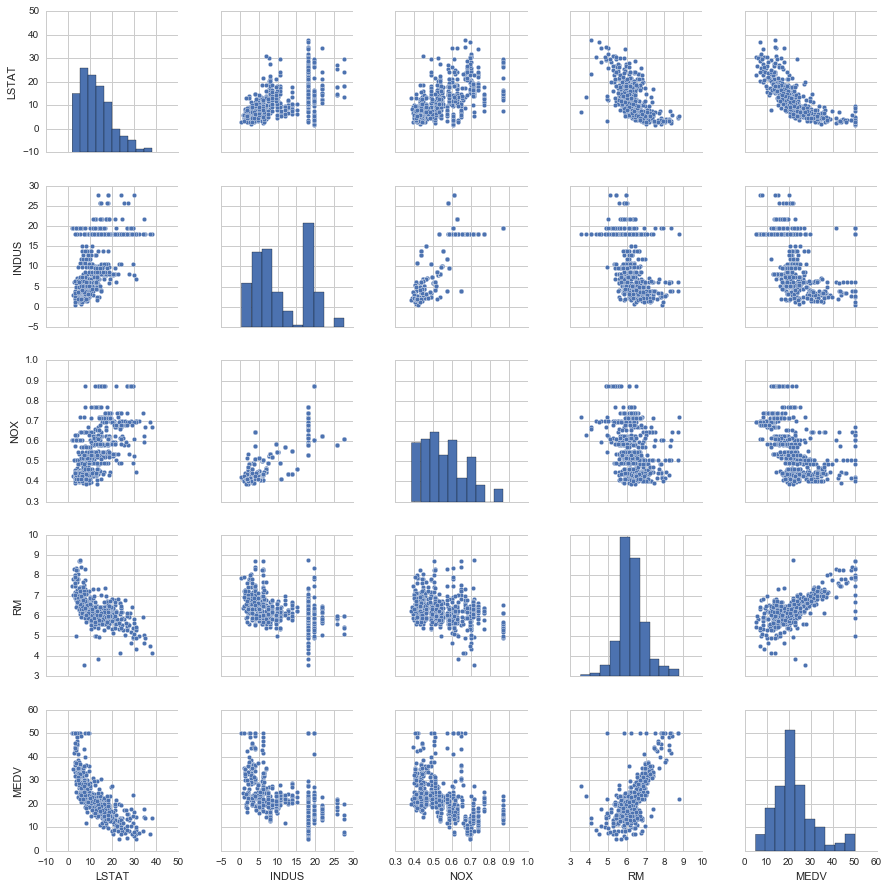

In [47]:
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

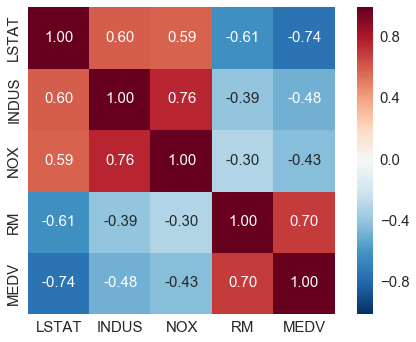

In [49]:

import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

cols = ['LSTAT', 'INDUS', 'NOX', 'RM']
X = df[cols].values
y = df['MEDV'].values

# 上記４つのパラメータで多重回帰を行う
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# MEDV（住宅価格）の予測
# 先ほどdf.showで表示した上２件の実績と予測を比較
x_1 = np.array(
    [[4.98, 2.31, 0.538, 6.575], 
     [9.14, 7.07, 0.469, 6.421]
    ])
slr.predict(x_1)

array([ 29.40993335,  25.66127839])

In [54]:
# LSTATに負の相関があることを確認
x_2 = np.array(
    [[4.98, 2.31, 0.538, 6.575], 
     [6.98, 2.31, 0.538, 6.575],
     [8.98, 2.31, 0.538, 6.575]
    ])
slr.predict(x_2)

array([ 29.40993335,  28.24254115,  27.07514894])

In [55]:
# RMに正の相関があることを確認
x_1 = np.array(
    [[4.98, 2.31, 0.538, 4.575], 
     [4.98, 2.31, 0.538, 6.575],
     [4.98, 2.31, 0.538, 8.575]
    ])
slr.predict(x_1)

array([ 18.92920538,  29.40993335,  39.89066133])

In [56]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

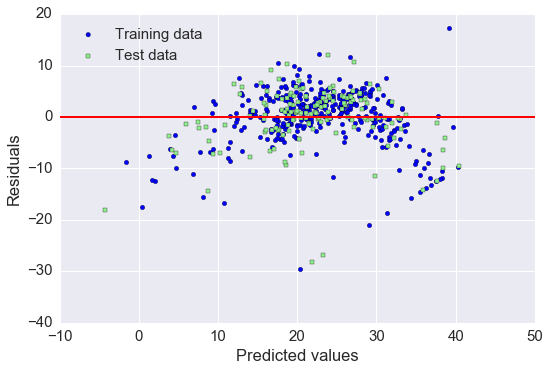

In [57]:
# 予測と実測値がどのくらい離れているかを可視化
# 過学習の度合いを確認するため、TrainingDataとTestDataでも分けている。
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()